# Telco Customer Churn Analysis
## Aim of the project
We have a classification problem. We wil make classification on the target variable Churn and we will build a model to get best classification possible on the target variable. We will look at the balance of the target variable. As we will see later, our target variable has imblanced data For that reason we are not going to use only Accuracy score, Based on the problem on the hand, we will use Combination of Recall and Accuracy scores. In order to combat class imbalance we can consider under/oversampling or drawing test data with equal proportions of classes.

## Data Dictionary

- CustomerID: A unique ID that identifies each customer.
- Gender: The customer’s gender: Male, Female
- Age: The customer’s current age, in years, at the time the fiscal quarter ended.
- Senior Citizen: Indicates if the customer is 65 or older: Yes, No
- Married (Partner): Indicates if the customer is married: Yes, No
- Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
- Number of Dependents: Indicates the number of dependents that live with the customer.
- Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
- Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
- Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
- Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
- Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
- Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
- Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
- Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
- Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
- Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
- Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
- Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
- Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
- Tenure: Indicates the total amount of months that the customer has been with the company.
- Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Data Source - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Exploratory Data Analysis
Importing necessary libraries

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


Data import and first glimpse

In [2]:
df=pd.read_csv(r'C:\Users\xtaym\Desktop\VSC projects\datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  7590-VHVEG  Female              0     Yes         No       1           No  \
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup   
0  No phone service             DSL             No          Yes  \
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
0               No          No          No              No  Month-to-month  \
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No  
2              Yes      Mailed check           53.85       108.15   Yes

In [3]:
print(df.isna().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
print(df.duplicated().sum())

0


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Our data is complete. No records are duplicated nor missing. We will modify few columns:
- customerID - dropped because it has no influence on churn
- TotalCharges - changing datatype from object to float
- Churn - We will encode churn to 0/1 values

In [6]:
df=df.drop(columns='customerID',axis=1)
# we encountered a problem when converting Charges to float type, there were empty values. We converted them to Nan's and then converted column to float
df['TotalCharges']=df['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
print(df['TotalCharges'].isna().sum(), 'number of NAs')
# we will drop them because their number is irrelevant
df=df.dropna()
print(df['TotalCharges'].isna().sum(), 'number of NAs post deletion')

11 number of NAs
0 number of NAs post deletion


There is a imbalance across classes it will be taken into account when sampling data for model developement.

## Target Variable

Churn
No     5163
Yes    1869
Name: count, dtype: int64 
 Percentage of clients that churned: 0.27 
 Percentage of clients that stayed with the company: 0.73


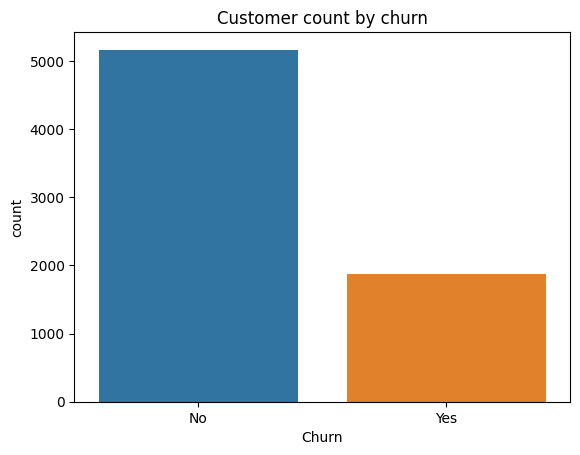

In [7]:
sns.countplot(df,x='Churn').set(title='Customer count by churn')
print(df['Churn'].value_counts(),'\n',
      'Percentage of clients that churned:' , round(df['Churn'][df['Churn']=='Yes'].value_counts()[0]/len(df),2),'\n',
      'Percentage of clients that stayed with the company:', round((1-(df['Churn'][df['Churn']=='Yes'].value_counts()[0])/len(df)),2))

We have imbalanced data. About 27% of the customers churned. Almost 73% of the customers stayed with the company.
1869 customer churned while 5174 customer did not.

In [8]:
le = LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])
#df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
num_cols= df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns

print(
f'Numerical Columns:  {df[num_cols].columns}','\n','\n',
f'Categorical Columns: {df[cat_cols].columns}')

Numerical Columns:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object') 
 
 Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [9]:
df[num_cols].describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000
mean        0.162400    32.421786       64.798208   2283.300441     0.265785
std         0.368844    24.545260       30.085974   2266.771362     0.441782
min         0.000000     1.000000       18.250000     18.800000     0.000000
25%         0.000000     9.000000       35.587500    401.450000     0.000000
50%         0.000000    29.000000       70.350000   1397.475000     0.000000
75%         0.000000    55.000000       89.862500   3794.737500     1.000000
max         1.000000    72.000000      118.750000   8684.800000     1.000000

Text(0.5, 0.98, 'Histograms of numerical variables')

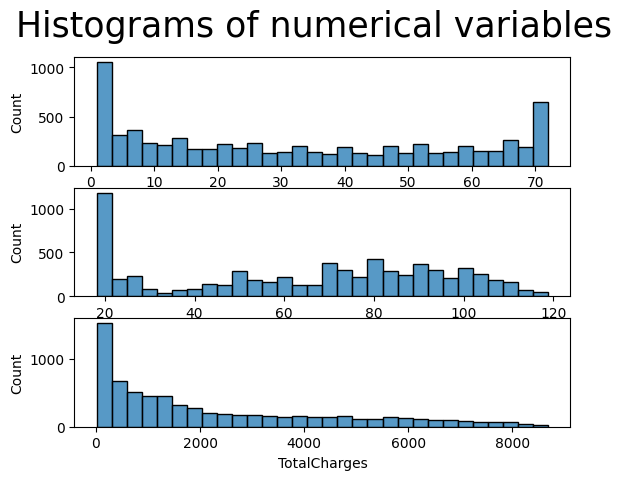

In [10]:
fig, ax =plt.subplots(3,1)
plt.rcParams["figure.figsize"] = [23, 15]
sns.histplot(data=df,x='tenure',bins=30,ax=ax[0])
sns.histplot(data=df,x='MonthlyCharges',bins=30,ax=ax[1])
sns.histplot(data=df,x='TotalCharges',bins=30,ax=ax[2])
fig.suptitle('Histograms of numerical variables',size=25)

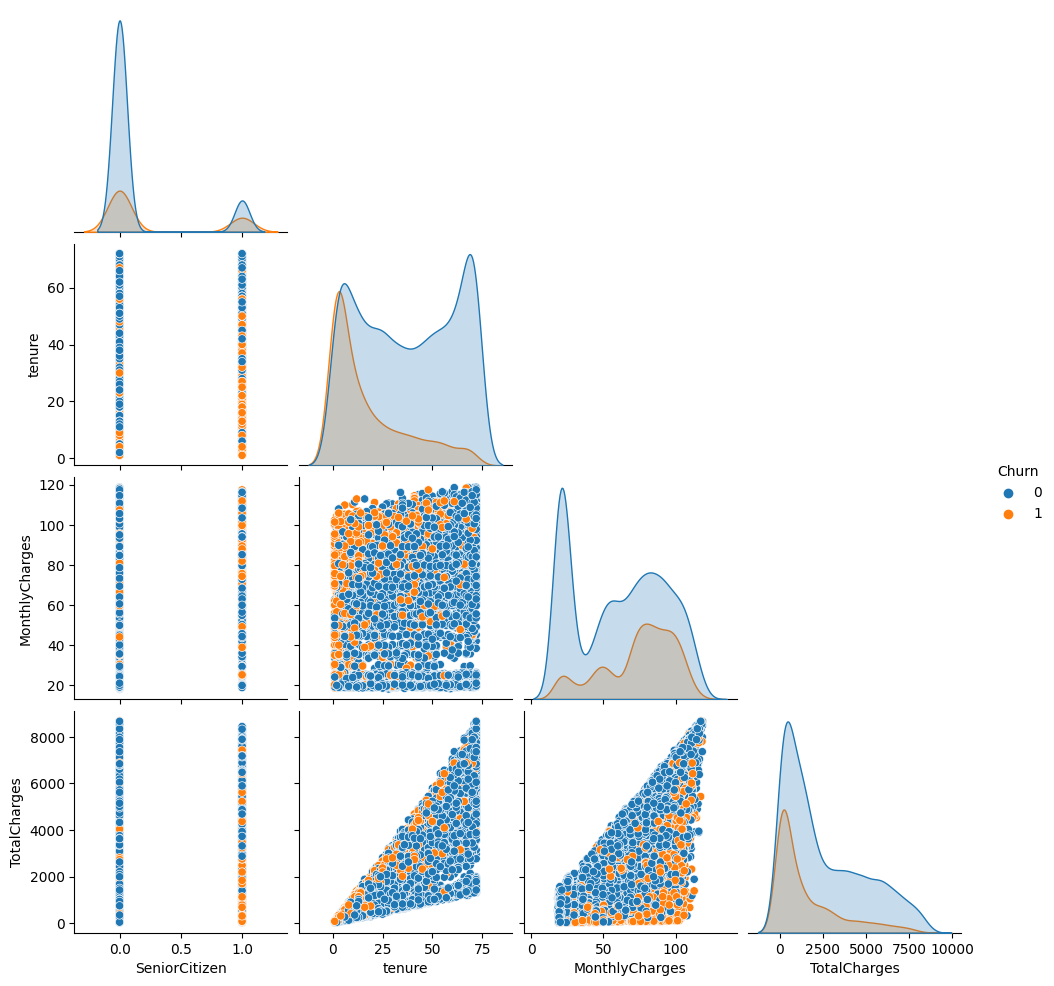

In [11]:
sns.pairplot(data=df,hue='Churn',corner=True)

Clients with shorter tenure have a higher chance of churn. The higher MonthlyCharges client has the more likely he is to Churn. Senior Citizens tend to Churn more often. We will examine it using correlation.

<Axes: >

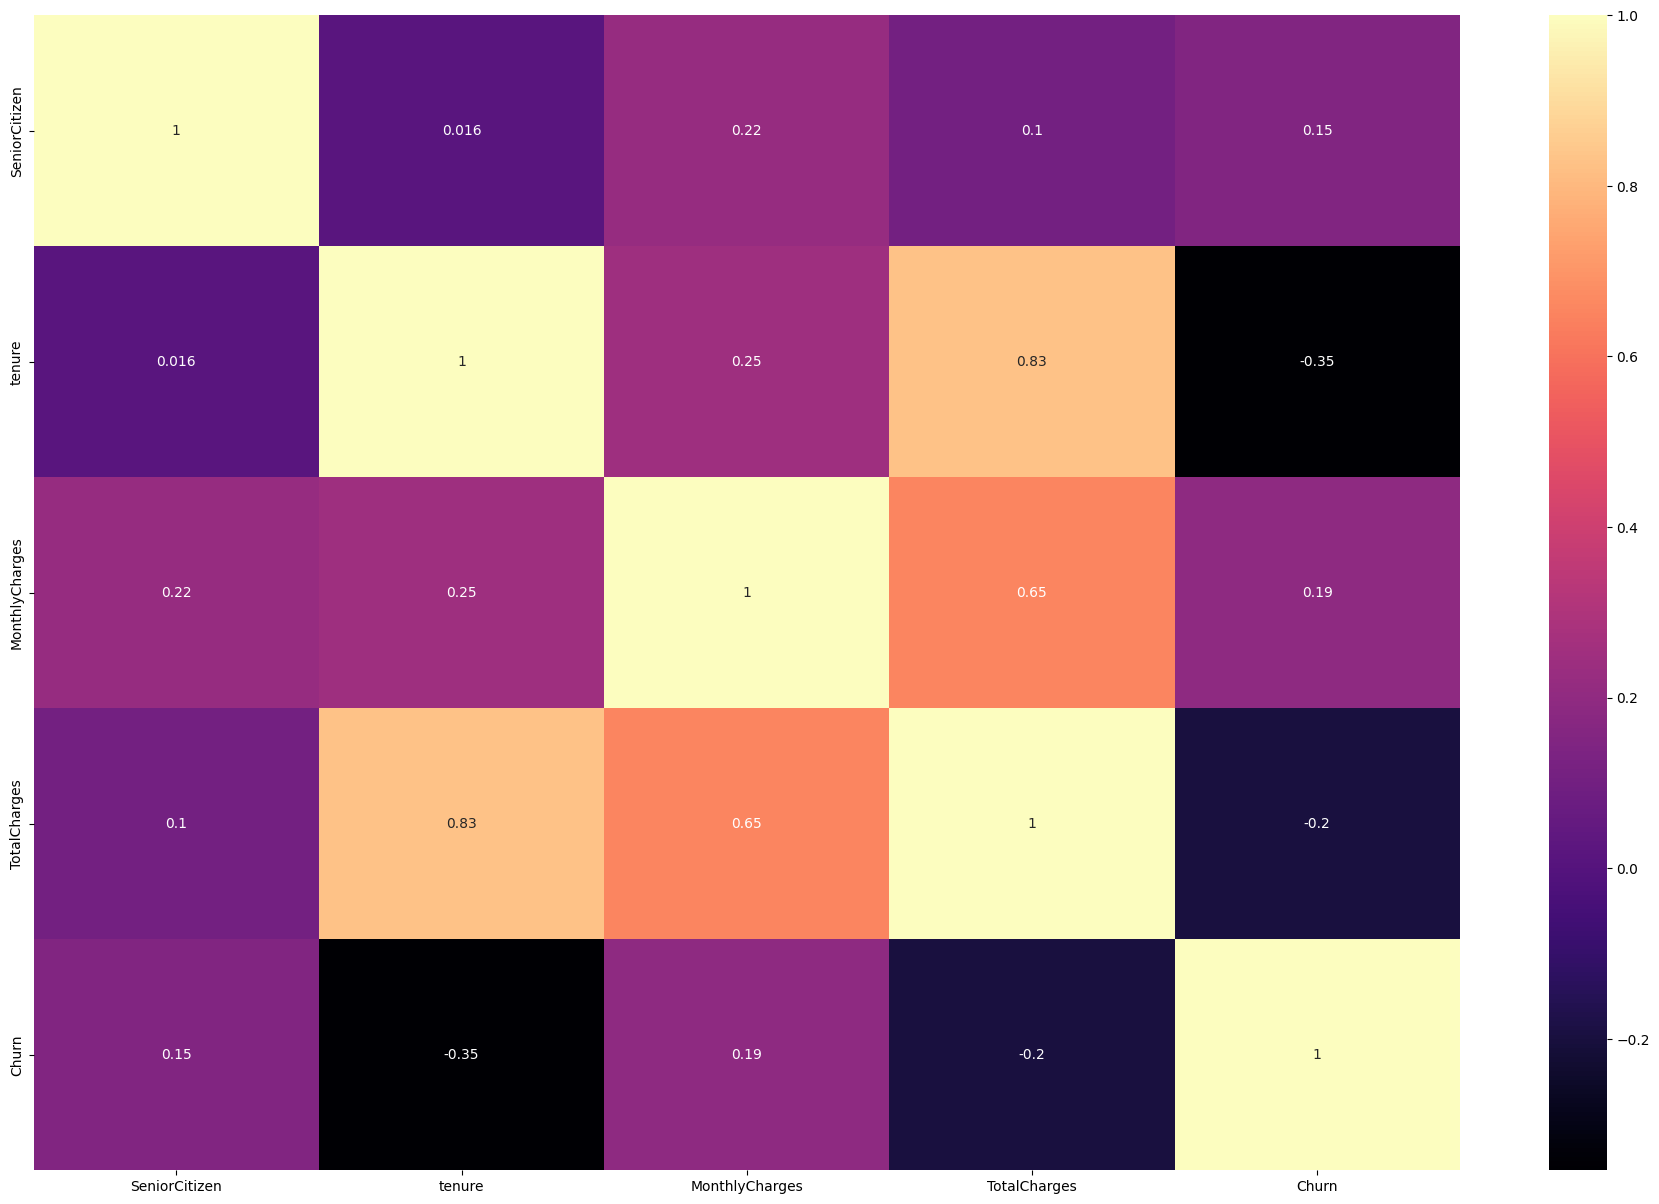

In [12]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap="magma")

The analysis of the dataset reveals several noteworthy correlations between the numerical features and the target variable:

- We observe a modest level of correlation between the numerical features and the target variable.
- Senior citizen status and higher monthly charges exhibit a positive correlation with customer churn.
- Senior citizens are more prone to churn compared to younger customers.
- Customers with elevated monthly charges are also more inclined to churn in contrast to those with lower monthly charges.
- Long-term customers are less likely to churn compared to those with a shorter history with the company.
- A robust positive correlation exists between tenure and total charges.
- Notably, total charges demonstrate a negative correlation with churn.

## Bivariate analysis

In [13]:
# Adding merged column to analyze Churn depending on contract type and column
df['merged']=df['Churn'].astype(str)+' : '+df['Contract']

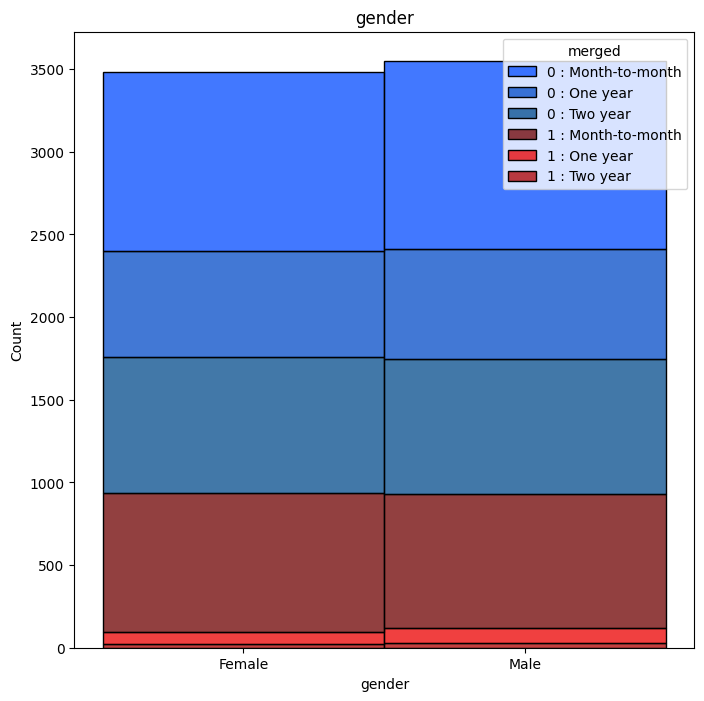

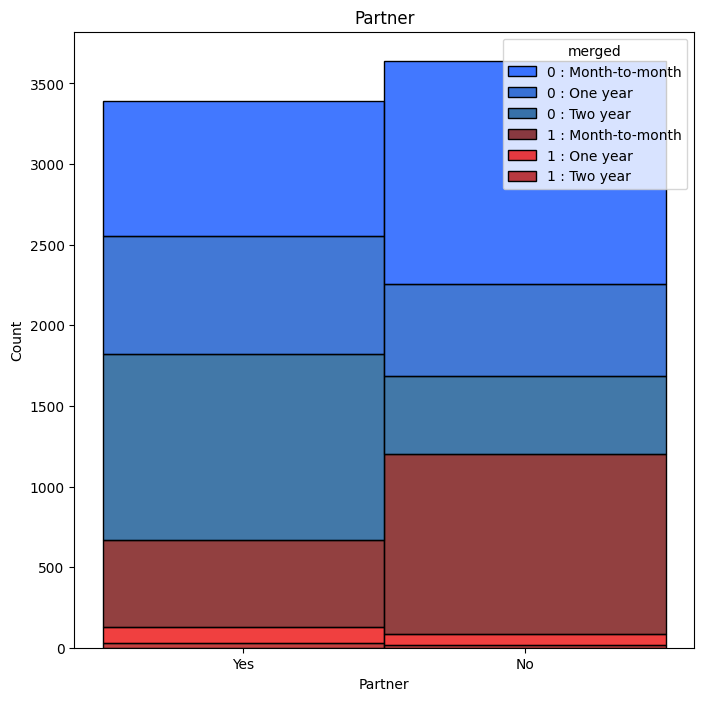

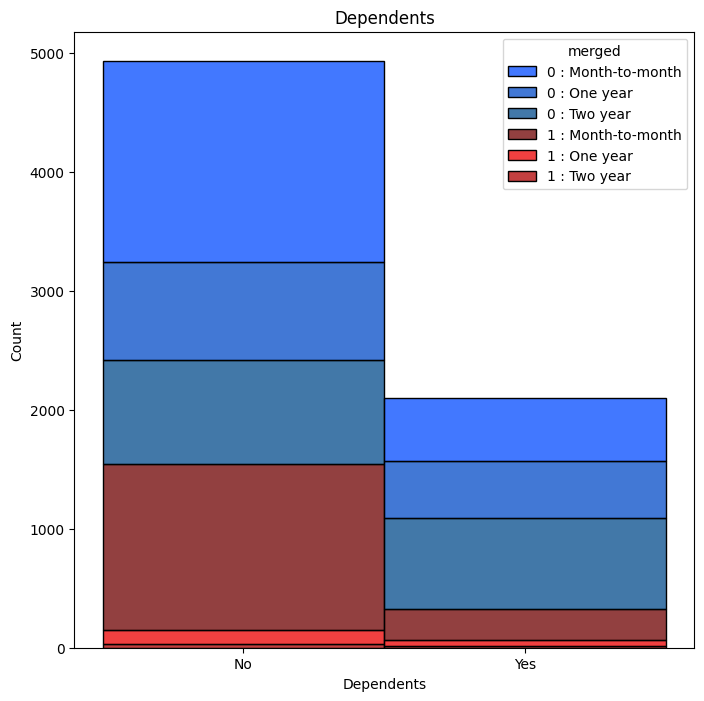

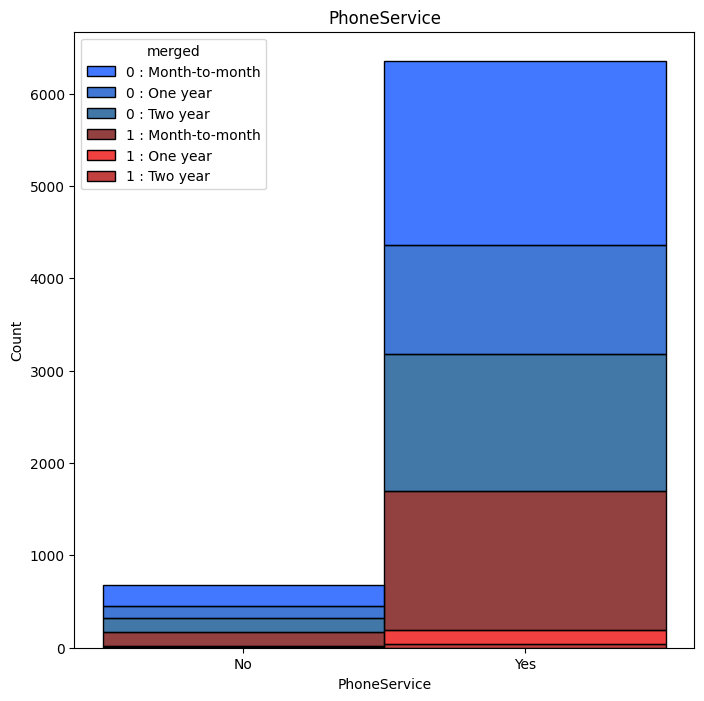

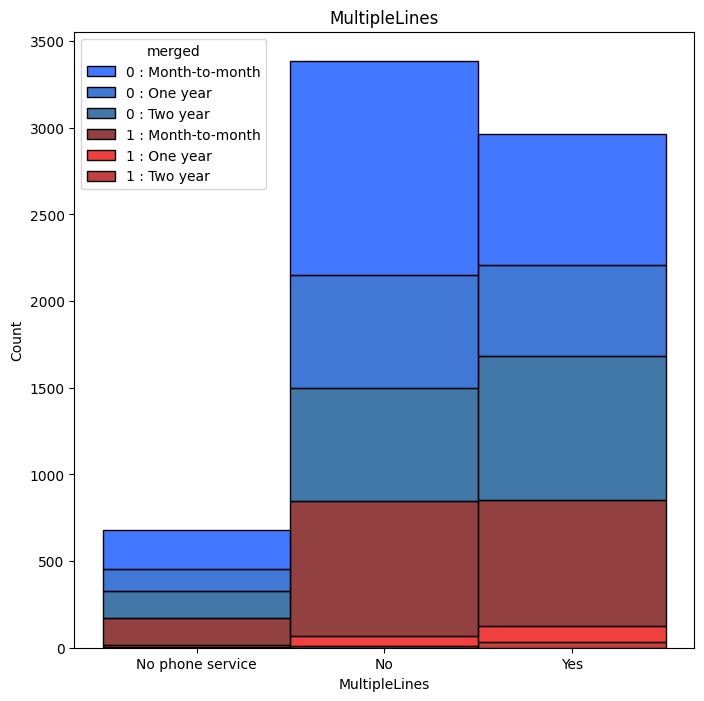

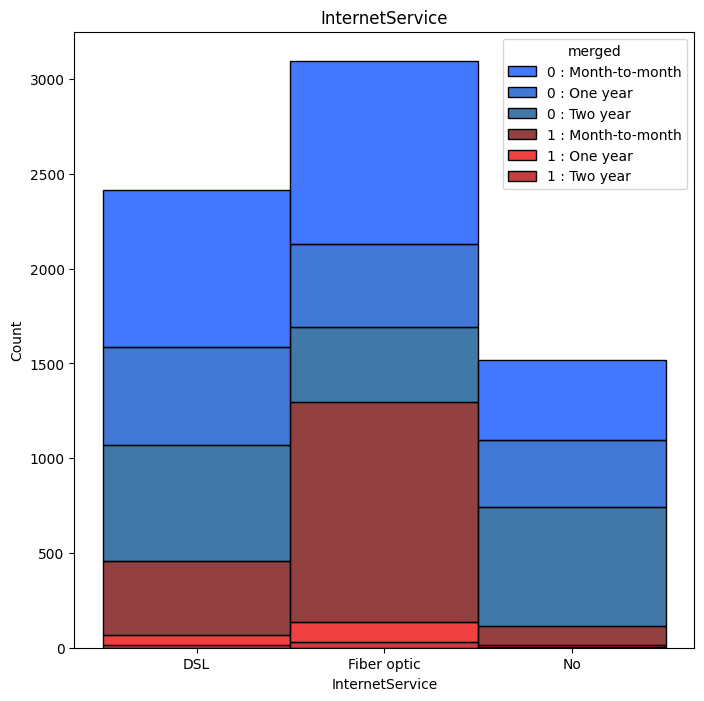

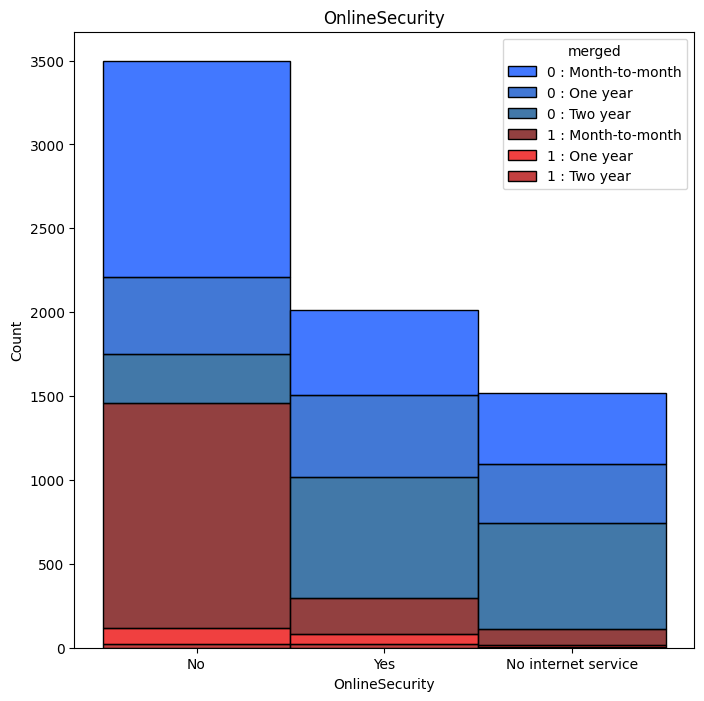

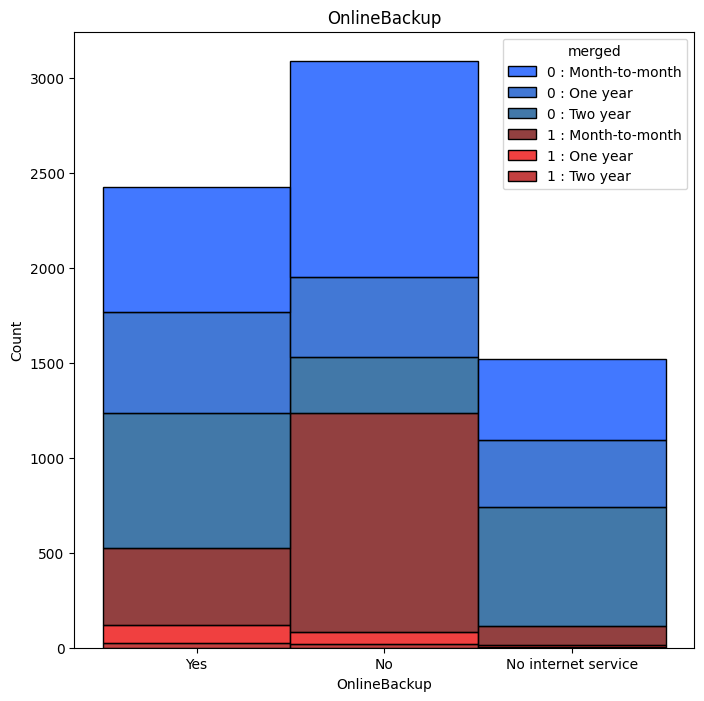

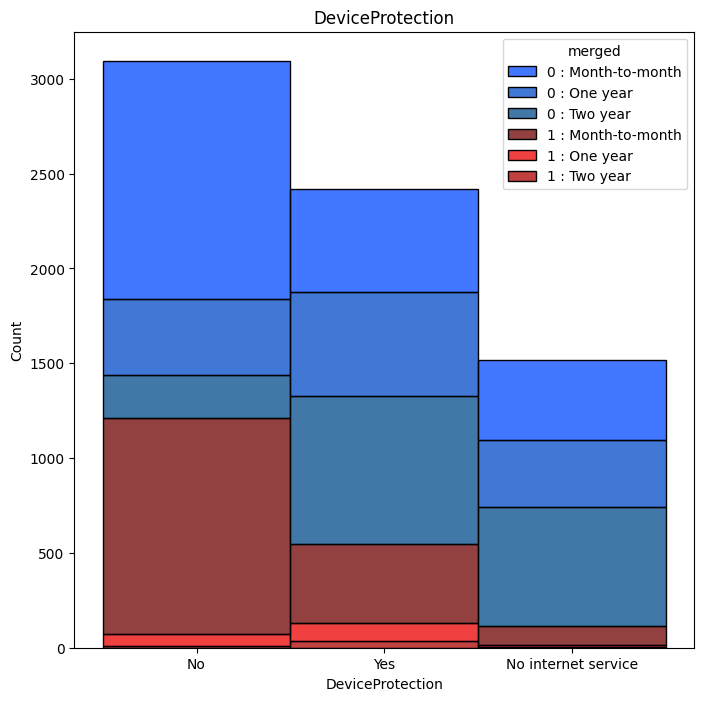

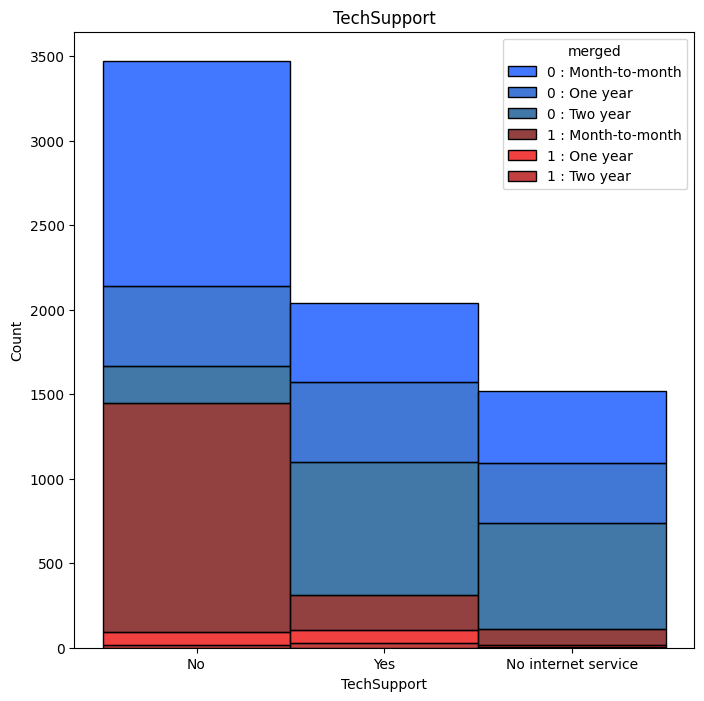

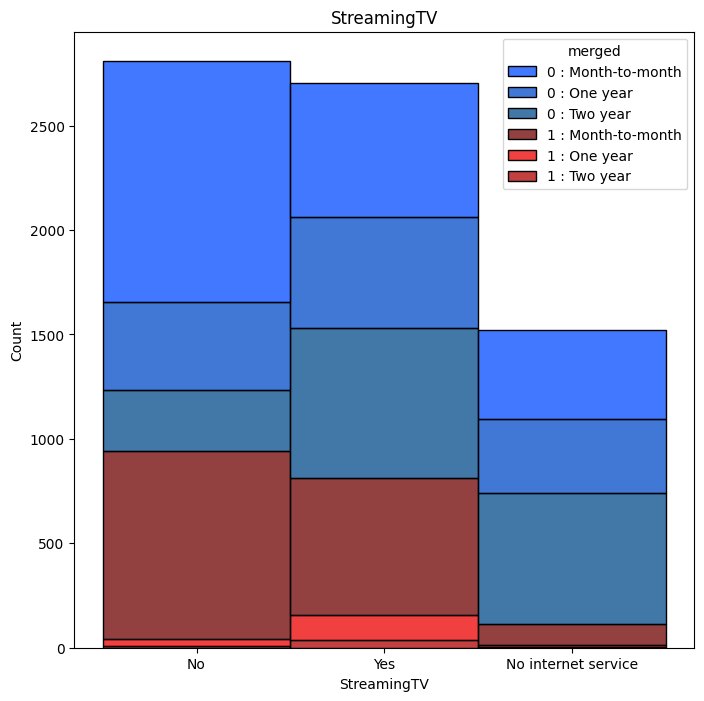

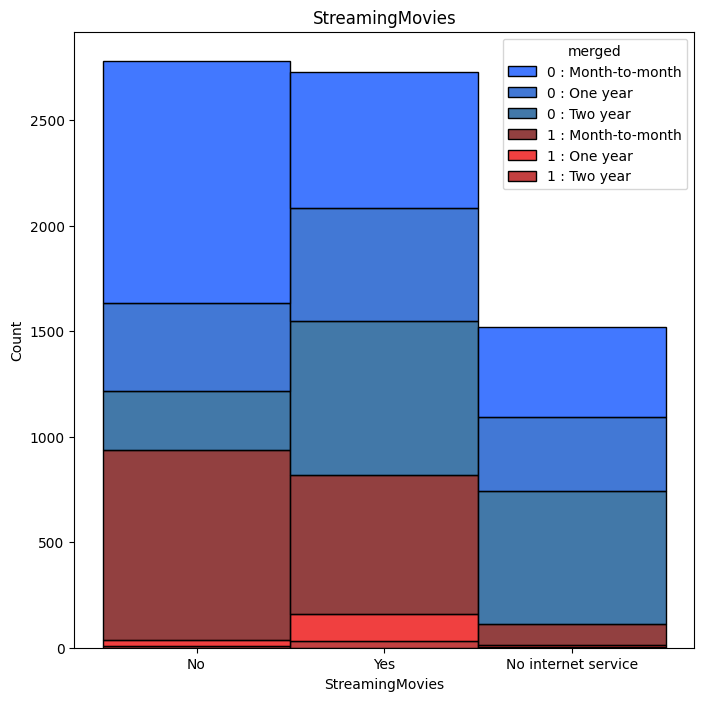

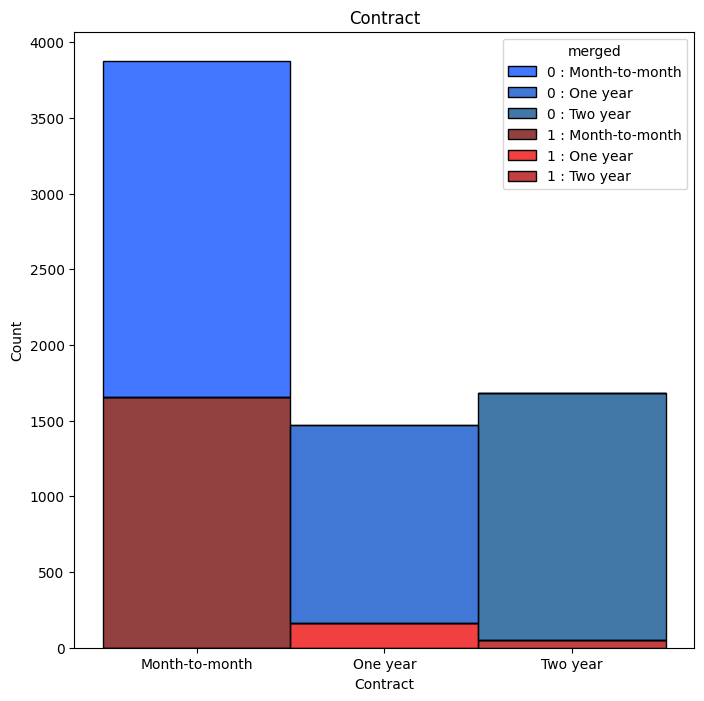

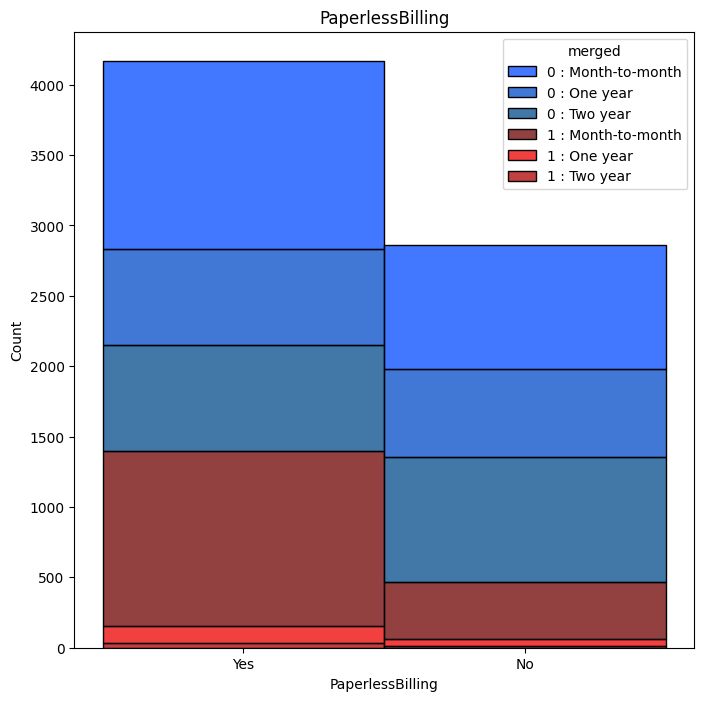

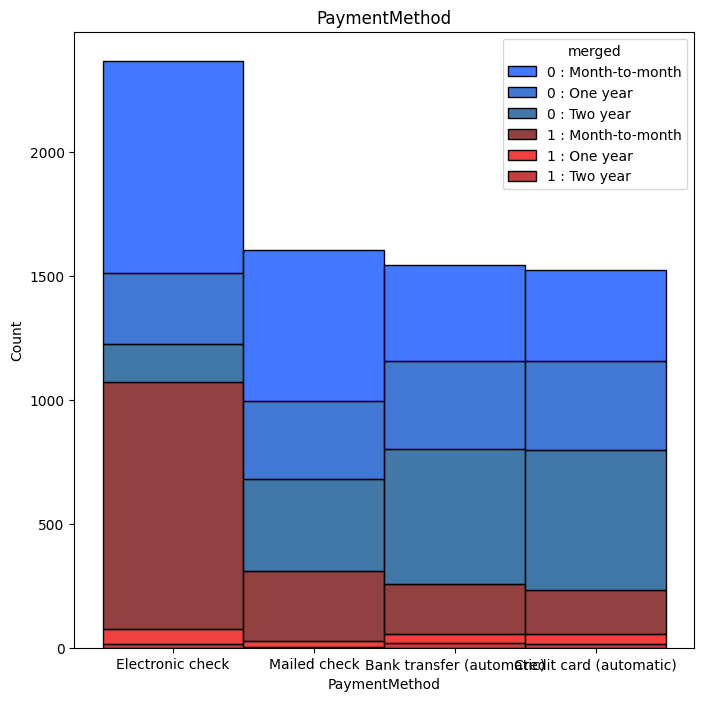

In [14]:
colors = {'0 : Month-to-month':'#024bff', '0 : One year':'#024bc7',
       '0 : Two year':'#024b8b', '1 : Month-to-month':'#6e0000', '1 : Two year':'#af0000', '1 : One year':'#eb0000'}
for i, col in enumerate(df[cat_cols].columns):
    plt.figure(figsize=(8, 8))
    sns.histplot(data=df, hue="merged", x=col, multiple="stack",palette=colors,hue_order=['0 : Month-to-month', '0 : One year',
       '0 : Two year','1 : Month-to-month', '1 : One year','1 : Two year'])
    plt.title(col)
    plt.show()

## Modeling


In [15]:
df.head(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService   
0  Female              0     Yes         No       1           No  \
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup   
0  No phone service             DSL             No          Yes  \
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract   
0               No          No          No              No  Month-to-month  \
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  Churn   
0              Yes  Electronic check           29.85         29.85      0  \
1               No      Mailed check           56.95       1889.50      0   
2              Yes      Mailed check           53.85        108.15      1   

               merged  
0  0 : Month-to-month  
1        0 : One year  
2  1 : Month-to-month

In [16]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1973)

Data has been split to test and train subsets. Test set is 30% of the original dataset.

## Approach
We want to predict if client churned or not. We will use and compare multiple methods in order to achieve this goal. Based on this we will find a method that works best in our scenario.

In [18]:
#importing necessary libraries for model creation
import statsmodels.api as sm

from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier


First we will create linear Regression model using all available variables.

In [19]:
X_train_oh=pd.get_dummies(X_train.drop(columns=['merged']), dtype=float, drop_first=True)
X_test_oh=pd.get_dummies(X_test.drop(columns=['merged']), dtype=float, drop_first=True)

Creating dummy variables, also known as one-hot encoding, is necessary in linear regression when you have categorical variables because linear regression is designed to work with numerical data.

In [180]:
#fit regression model
model_lr = LogisticRegression(random_state=1973)
model_lr.fit(X_train_oh,np.array(y_train).reshape(-1, 1),)
y_lr_predict=model_lr.predict(X_test_oh)


In [181]:
# function that we will use to compare models later on
def evaluate(model, test_features, test_labels,ret_acc=True,ret_all=False):
    predictions = model.predict(test_features)
    accuracy=accuracy_score(predictions, test_labels)
    recall=recall_score(predictions, test_labels)
    precision=precision_score(predictions, test_labels)
    print(f'Model Performance')
    print(f'Accuracy = {round(accuracy,3)}%')
    print(f'Recall = {round(recall,3)}%')
    print(f'Precision = {round(precision,3)}%')
    if ret_all==True:
        return accuracy,recall,precision
    elif ret_acc==True: 
        return accuracy
    

In [182]:
evaluate(model_lr,X_test_oh,y_test,ret_acc=False)

Model Performance
Accuracy = 0.802%
Recall = 0.696%
Precision = 0.53%


Without any tweaking of linear regression we are able to achieve performance shown above. Acurraccy is sufficient, however recall achieved could be better meaning that only 69,6% Clients that will Churn are labelerd correctly. One way of changinr our LR could be tweaking threshold (probability of churn) at which LR assumes our customer will Churn. We will test this approach below. In order to do that we will prodeict probablilities instead of predicitions from our model.

In [186]:
y_prob_lr_initial = model_lr.predict_proba(X_test_oh)  
# Returns probabilities for both classes (0 and 1)

In [185]:
# Define a range of threshold values to test

def test_thresh(x):
    threshold_value=[]
    scores_acc=[]
    scores_f1=[]
    scores_rec=[]
    scores_prec=[]
    for i in np.linspace(0, 1, 101):
        threshold = i  # You can adjust the threshold as needed
        y_pred_fun = (x[:, 1] > threshold).astype(int)
        threshold_value.append(i)
        scores_acc.append(accuracy_score(y_test, y_pred_fun))
        scores_f1.append(f1_score(y_test, y_pred_fun))
        scores_rec.append(recall_score(y_test, y_pred_fun))
        scores_prec.append(precision_score(y_test, y_pred_fun))
        #scores_roc.append(roc_auc_score(y_test, y_prob))
    return pd.DataFrame({'threshold_value':threshold_value,'score_acc':scores_acc,'score_f1':scores_f1,'score_rec':scores_rec,'score_prec':scores_prec},index=threshold_value)

In [187]:
score_matrix=test_thresh(y_prob_lr_initial)
best_thresh=float(score_matrix.loc[score_matrix['score_acc']==score_matrix['score_acc'].max(),'threshold_value'])
print(f"We have highest accuracy with threshold set at {best_thresh*100} %. Meaning that if someone has a chance to churn higher than 52% we assume he will churn")

TypeError: cannot convert the series to <class 'float'>

Here we can see how our logistic regression model behaves for different threshold values. By lowering it we can achieve higher Recall which can help us better identify Churners at cost of overall accuracy.

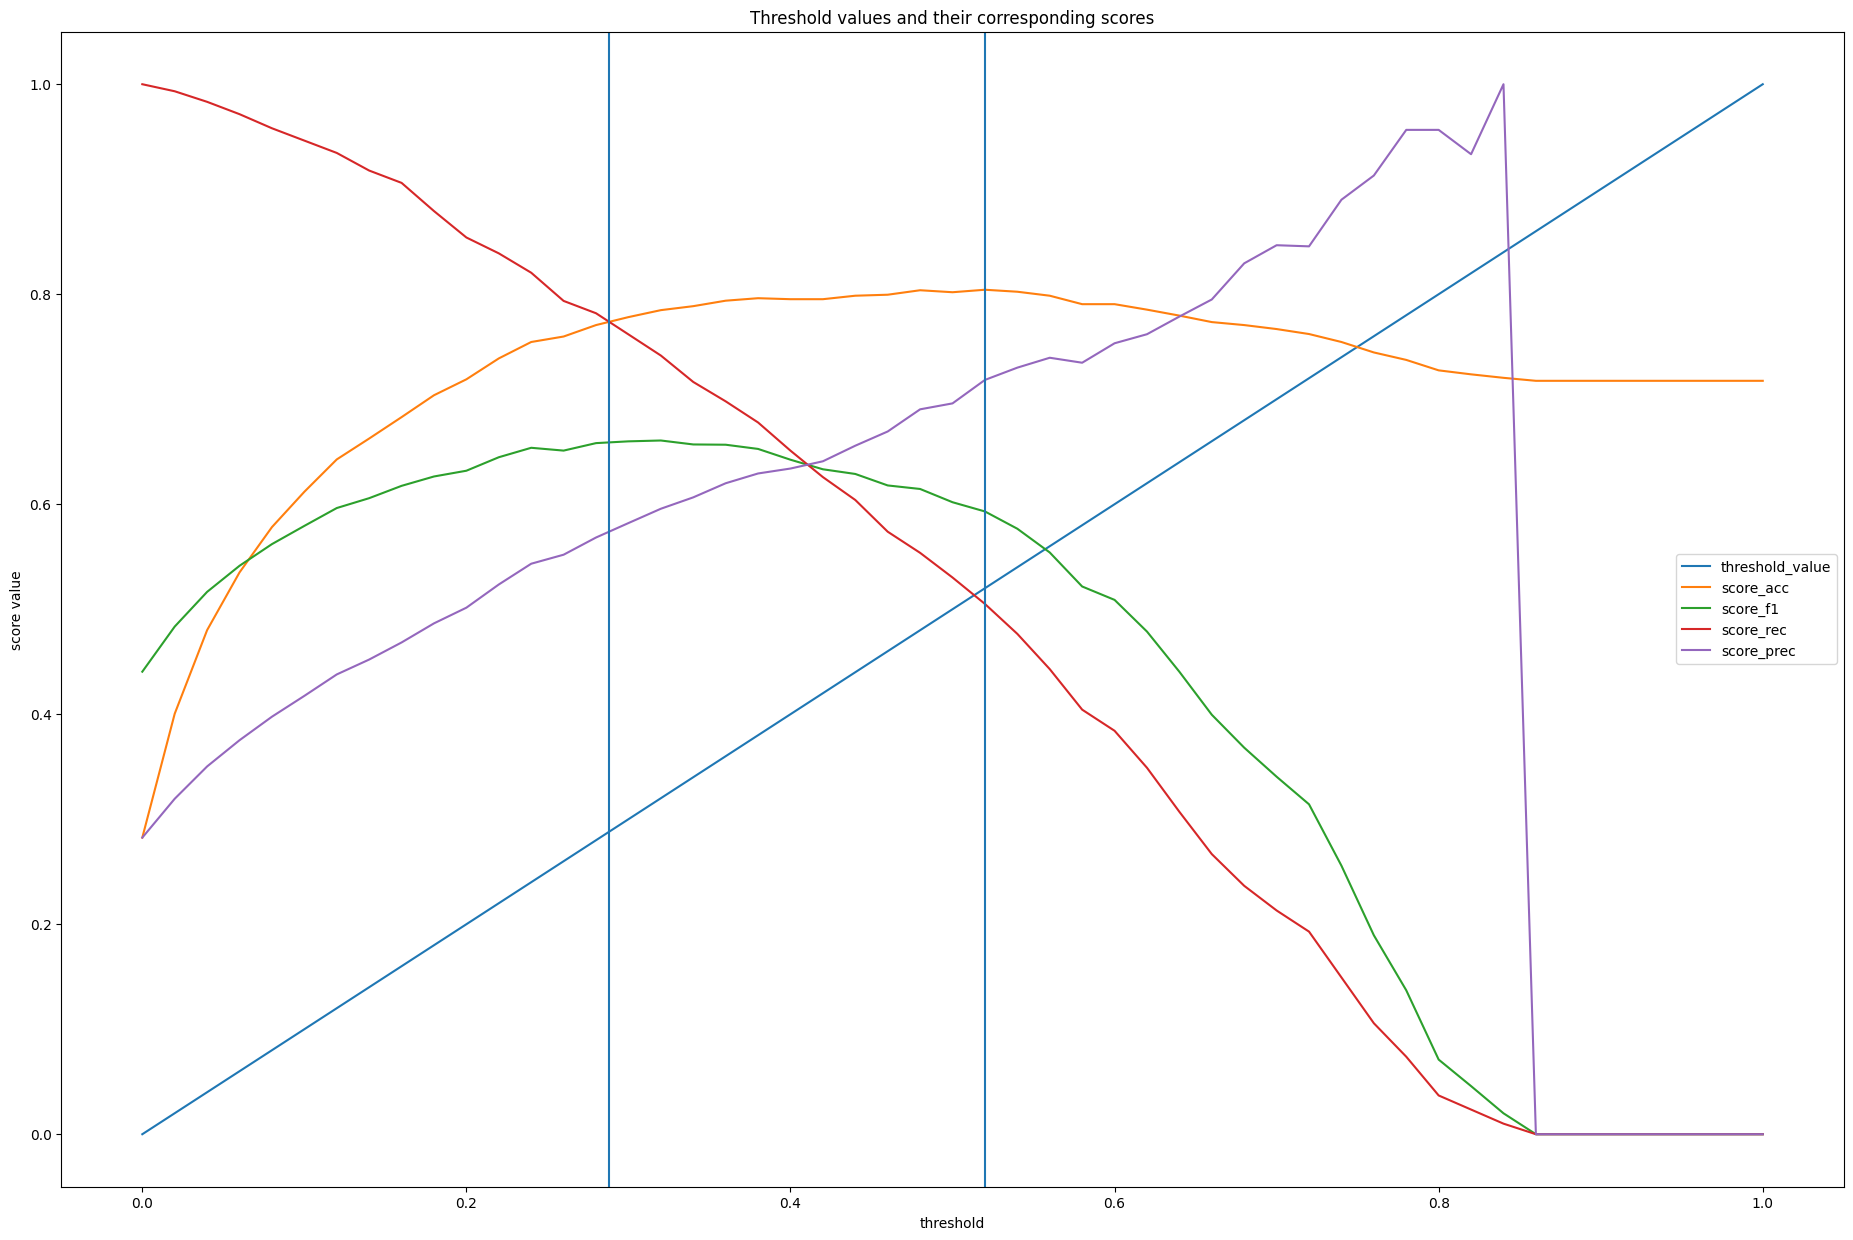

In [128]:
test_thresh(y_prob_lr_initial).plot(title='Threshold values and their corresponding scores',xlabel='threshold',ylabel='score value')
plt.axvline(0.52)
plt.axvline(0.288)

In [131]:
# Apply a threshold to obtain binary predictions
def acc_rec_prec(x,thresh=0.5):
    y_pred_final = (x[:,1].reshape(len(x),1) > thresh) # Predict class 1 if probability > threshold

    # Evaluate the model
    accuracy_final = accuracy_score(y_test, y_pred_final)
    recall_final=recall_score(y_test, y_pred_final)
    precision_final=precision_score(y_test, y_pred_final)
    print(f"""Accuracy is {round(accuracy_final*100,2)}% \n 
    Recall is {round(recall_final*100,2)}% \n
    Precision is {round(precision_final*100,2)}%""")

acc_rec_prec(y_prob_lr_initial,thresh=0.288)

Accuracy is 77.39% 
 
    Recall is 77.52% 

    Precision is 57.39%


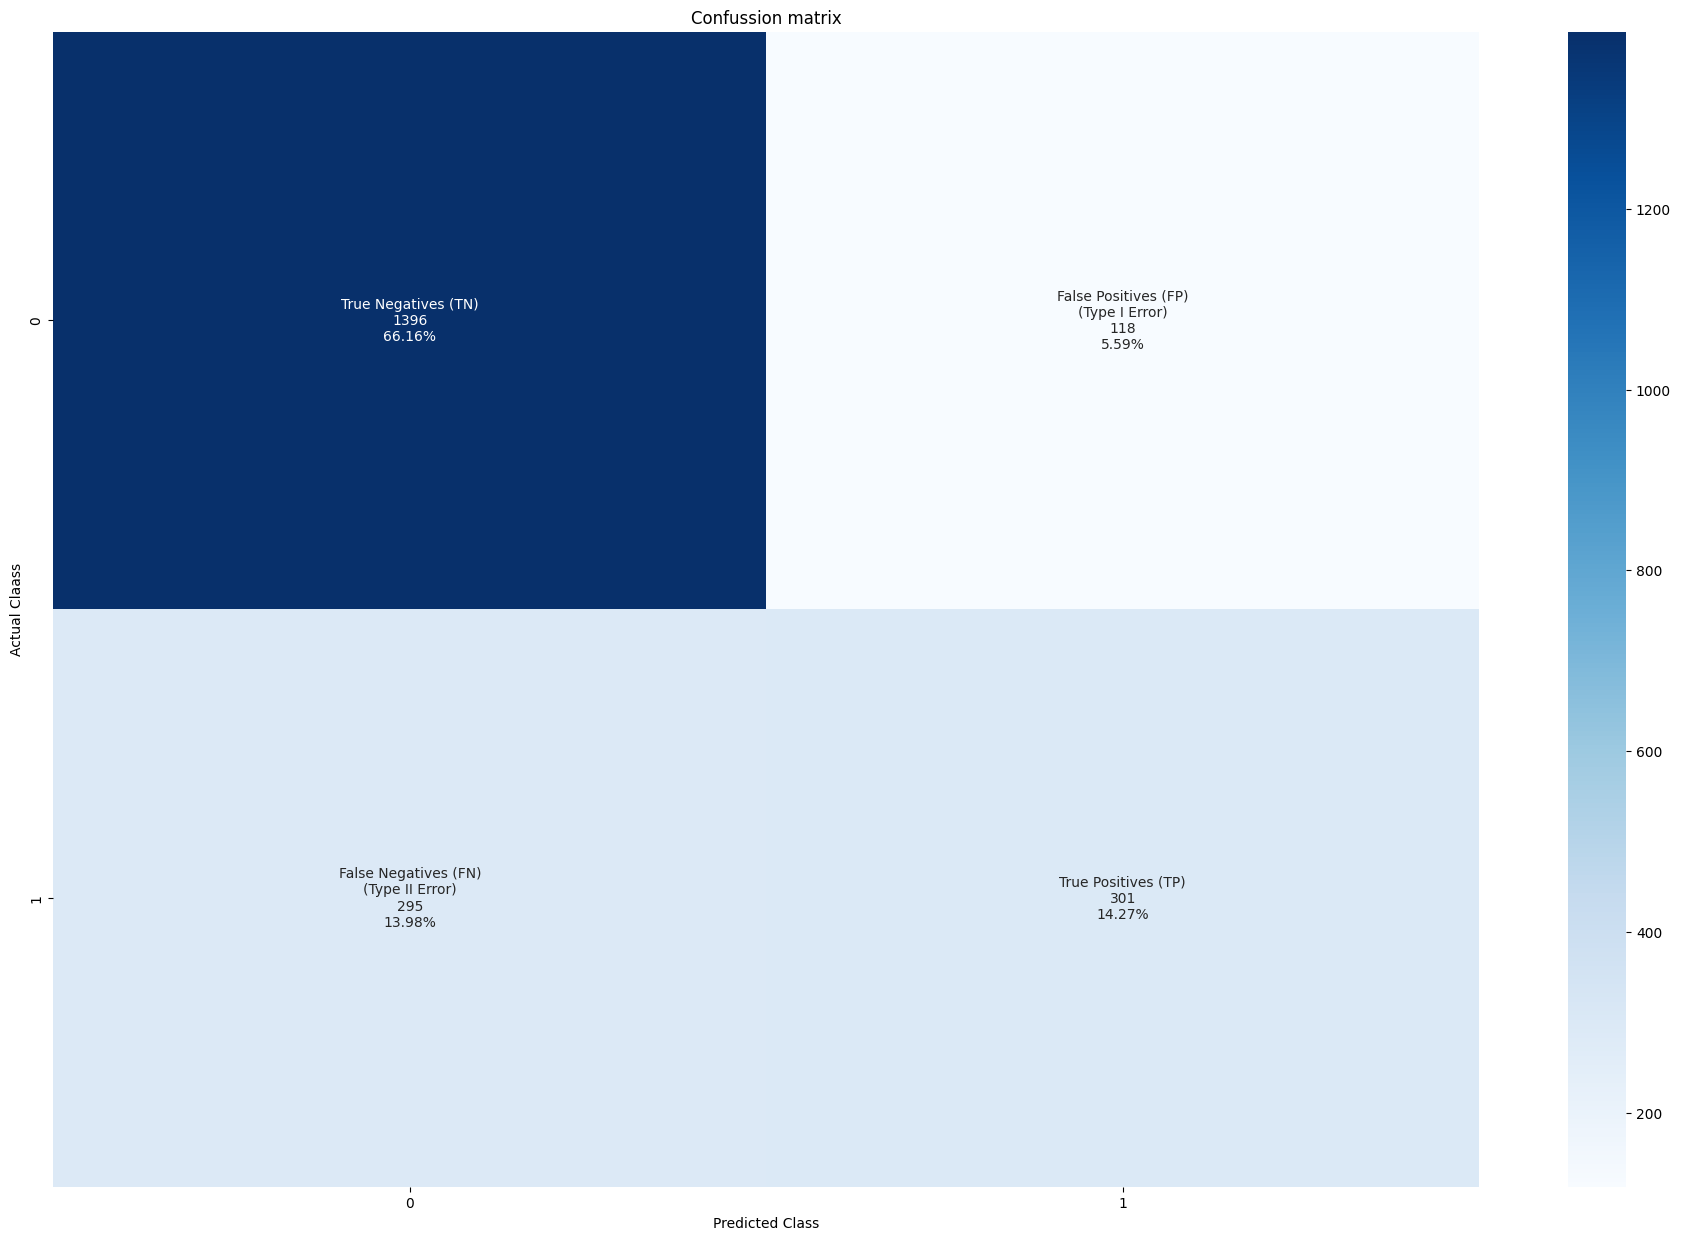

In [24]:
confusion = confusion_matrix(y_test, y_pred)
group_names = ["True Negatives (TN)", "False Positives (FP)\n(Type I Error)", "False Negatives (FN)\n(Type II Error)", "True Positives (TP)"]
group_counts = ["{0:0.0f}".format(value) for value in
                confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
ax = sns.heatmap(confusion, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Claass",title='Confussion matrix');

## Findings from first model
Our business goal is to identify as many customers that will churn as possible. In order to do that we choose threshold at 52% meaning that customer with a chance above 52% to churn is label as churn.
We choose this threshold because it achieves the best accuracy. 

- Accuracy is 80.43%: This means that the model correctly predicted approximately 80.43% of all cases, considering both customers who churned and those who did not. In other words, out of all predictions made by the model, about 80.43% were correct.
- Precision is 71.84%: Precision at 71.84% tells us that when the model predicted a customer to churn, it was accurate approximately 71.84% of the time. In other words, out of all the predictions of churn made by the model, roughly 71.84% were correct.
- Recall is 50.5%: The recall score of 50.5% indicates that the model successfully identified roughly 50.5% of the customers who actually churned. This metric measures the model's ability to capture churned customers out of all the customers who churned. In this case, the model identified about half of the churning customers.


FINDING: Looking at our model and its results for different thresholds i would propably suggest to choose smaller threshold at around 0.25-0.3 range. This will change models precision, it will drop a bit to around ~75%. Recall will be much higher at around 75% meaning that we will be able to identift 75% of customers that will Churn correctly meaning that we will be able to keep more of them, achievieng our business goal. Our threshold should not be only based on Precision. 

In [132]:
acc_rec_prec(y_prob_lr_initial,thresh=0.288)

Accuracy is 77.39% 
 
    Recall is 77.52% 

    Precision is 57.39%


By dropping threshold to 0.288 we were able to raise recall to 77.5% meaning that we are able to correctly identify 27 percentage points more of clients that want to churn. It is a huge difference with a minor drop in Accuracyy. Only downside to this approach is decrase in precision to 57.4% meaning that 43% of time we predict that customer will churn incorrectly. 

## Improving our base model
We will consider addressing class imbalance first!
Also when evaluating models we base on combination of Acurraccy and Recall. Ideally both should be above 75%.
### Introduction
Class imbalance is a common challenge in machine learning, particularly in binary classification tasks. In this report, we explore strategies to combat class imbalance in a dataset with 7,000 records, ensuring that our machine learning model can effectively learn from both minority and majority classes. Addressing class imbalance is crucial to prevent the model from being biased toward the majority class and to improve its predictive performance.
### Method and strategies
1. Modify the Decision Threshold and Use Different Evaluation Metrics - We already done that in our previous example maybe it will help there, we will see.
Adjust the classification threshold to increase sensitivity (lower threshold) or specificity (higher threshold) based on specific project objectives and requirements. Rely on metrics such as precision, recall, F1-score, ROC AUC, or PR AUC instead of accuracy to assess model performance, as they offer a more comprehensive view of performance in imbalanced datasets.
2. Ensemble Methods Consider using ensemble methods like Random Forest, Gradient Boosting, or Balanced Random Forest, which handle imbalanced datasets more effectively by giving weight to different classes. We will try that later, now we want to tweak only our base linear regression first.
3. Resampling Techniques, BINGO! Through simple resampling we should be able to achieve better results.
- Oversampling: Increase the number of Churn instances by duplicating or generating synthetic samples using methods like SMOTE or ADASYN.
- Undersampling: Reduce the number of No Churn instances by randomly removing samples. Be cautious to avoid loss of critical information.
- Combination of Oversampling and Undersampling: A balanced approach that combines both oversampling and undersampling techniques to address class imbalance.

In [136]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1973)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_oh, y_train)


In [137]:
print(f"""value counts pre resampling - \n{y_train.value_counts()},\n\nvalue conuts after resampling - \n{y_train_resampled.value_counts()}""")

value counts pre resampling - 
Churn
0    3649
1    1273
Name: count, dtype: int64,

value conuts after resampling - 
Churn
1    2193
0    1894
Name: count, dtype: int64


As we can see resampling reduced class imbalance.

In [138]:
#fit regression model
model_lr_resamp = LogisticRegression()
model_lr_resamp.fit(X_train_resampled,np.array(y_train_resampled).reshape(-1, 1),)

#view summary of model fit
y_pred_resamp = model_lr_resamp.predict(X_test_oh)
y_prob_resamp = model_lr_resamp.predict_proba(X_test_oh)  # Returns probabilities for both classes (0 and 1)

In [139]:
evaluate(model_lr_resamp,X_test_oh,y_test,ret_acc=False)

Model Performance
Accuracy = 0.753%
Recall = 0.542%
Precision = 0.805%


At max accuracy we achieve better recall than in initial model, however max accuracy is lower by 5 percentage points which is not promising, once again we will try to adjust threshold by hand to achieve better results.

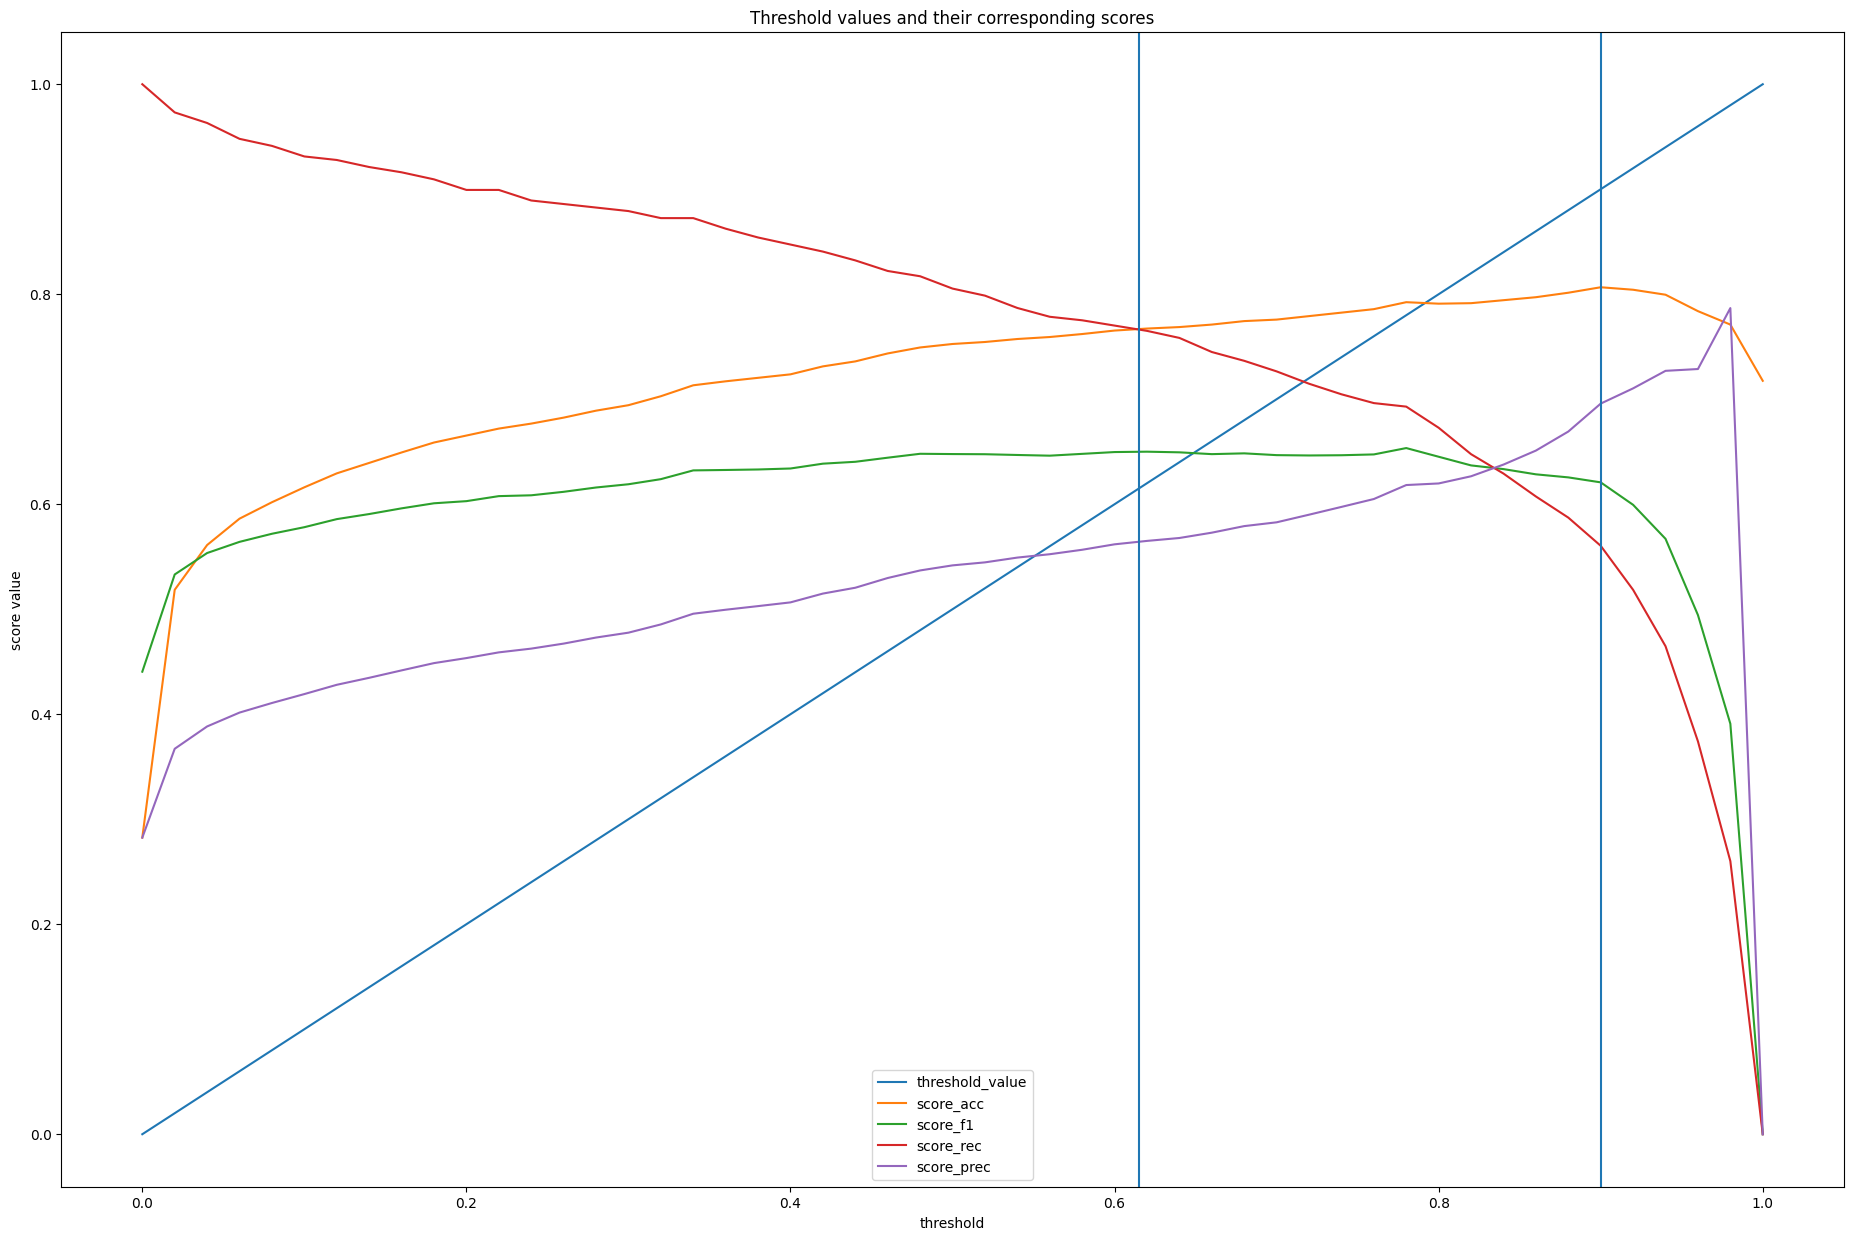

In [141]:
test_resamp=test_thresh(x=y_prob_resamp)
test_resamp.plot(title='Threshold values and their corresponding scores',xlabel='threshold',ylabel='score value')
plt.axvline(float(test_resamp.loc[test_resamp['score_acc']==test_resamp['score_acc'].max(),'threshold_value']))
plt.axvline(0.615)

In [143]:
acc_rec_prec(y_prob_resamp,thresh=0.615)

Accuracy is 76.54% 
 
    Recall is 76.51% 

    Precision is 56.23%


Our initial LR model is resistant to class imbalance, after resampling model produced similiar results. In this case class imbalance is not a major problem that negativelly influences the model. Now we will try to create a better model and use our linear regression model as benchmark.

In [144]:
#fit regression model
model_rf = RandomForestClassifier(random_state=1973)
model_rf.fit(X_train_oh,np.array(y_train).reshape(-1, 1),)

#view summary of model fit
y_for_predict=model_rf.predict(X_test_oh)
y_prob_forest = model_rf.predict_proba(X_test_oh)  # Returns probabilities for both classes (0 and 1)

In [148]:
evaluate(model_rf,X_test_oh,y_test,ret_acc=False)

Model Performance
Accuracy = 0.782%
Recall = 0.66%
Precision = 0.475%


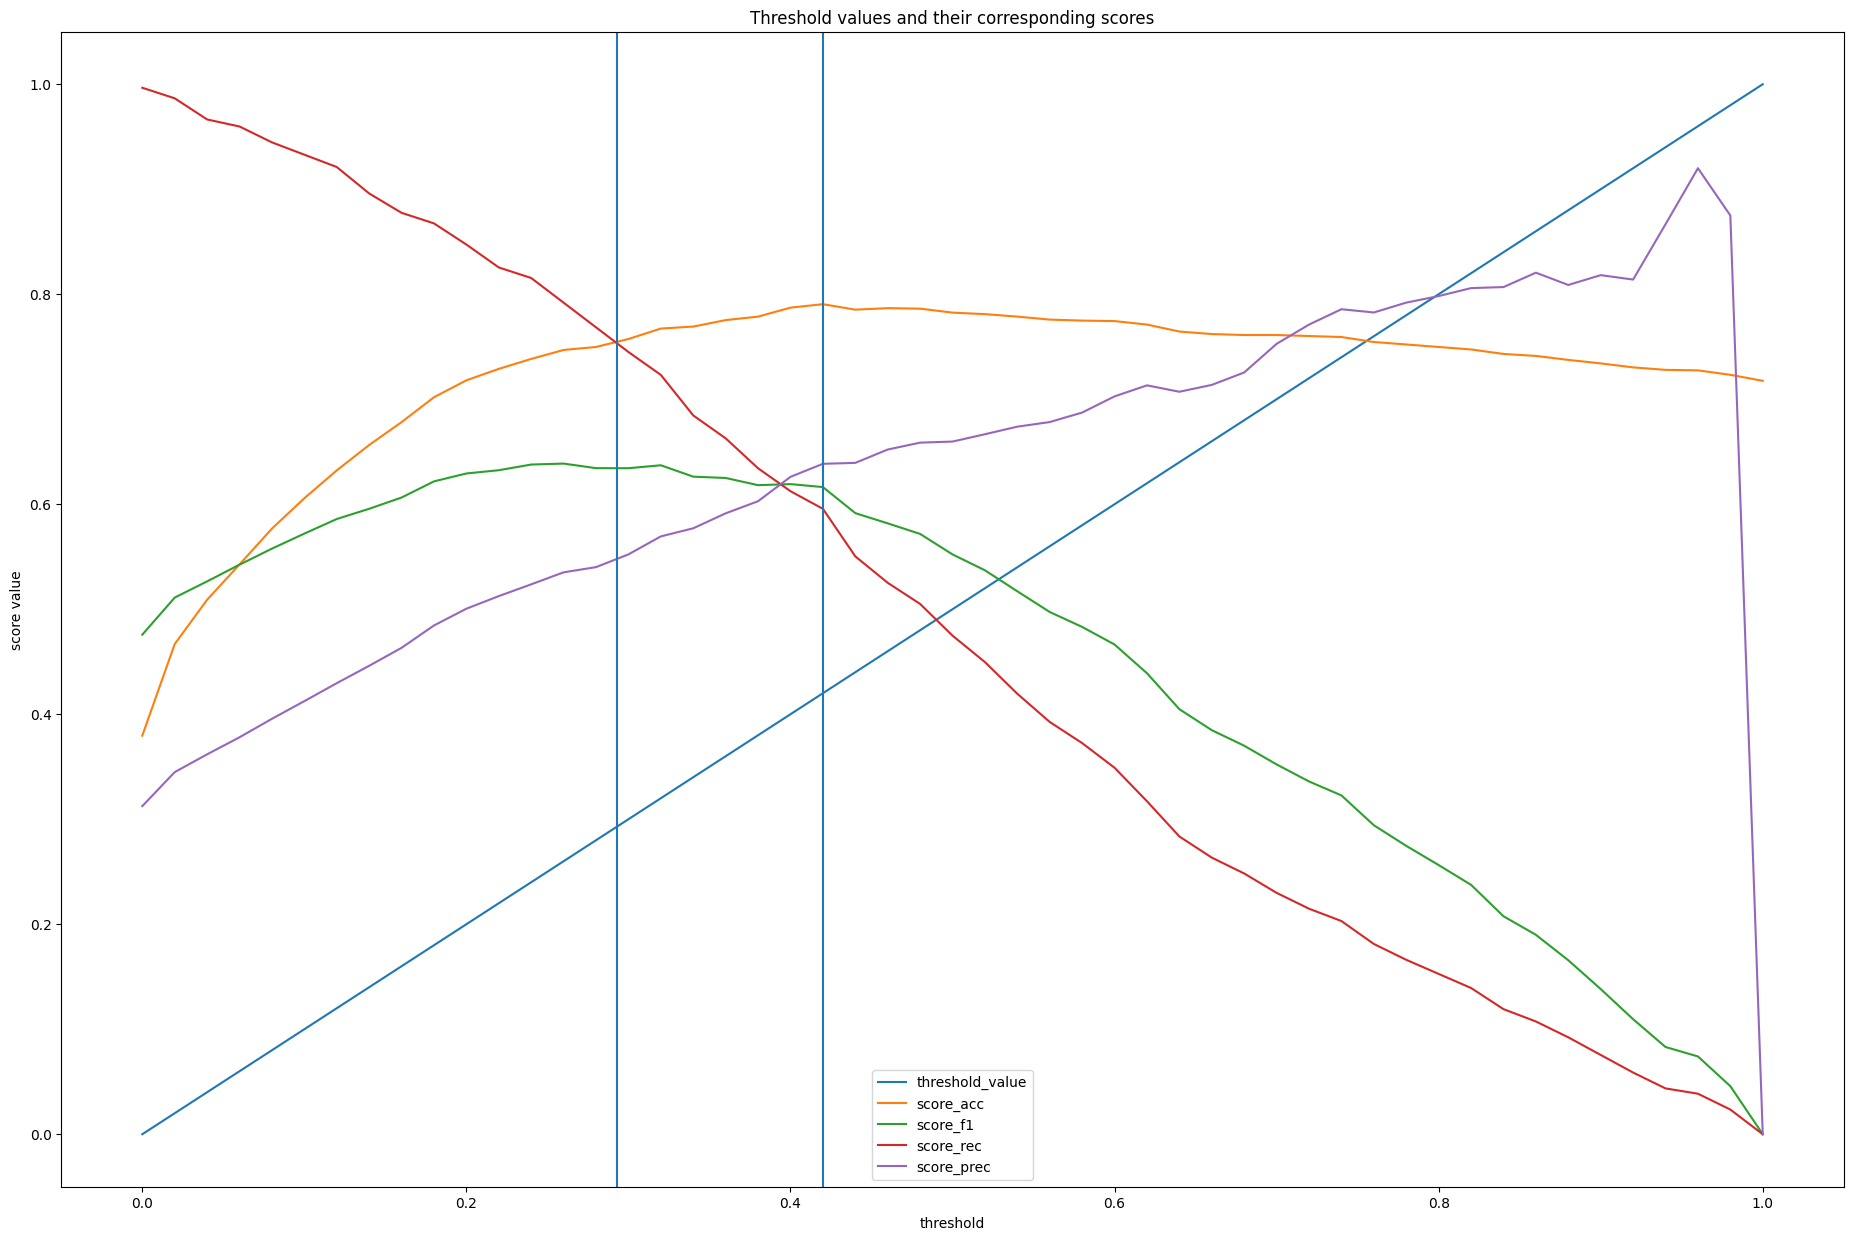

In [153]:
test_forest_innit=test_thresh(x=y_prob_forest)
test_forest_innit.plot(title='Threshold values and their corresponding scores',xlabel='threshold',ylabel='score value')
plt.axvline(float(test_forest_innit.loc[test_forest_innit['score_acc']==test_forest_innit['score_acc'].max(),'threshold_value']))
plt.axvline(0.293)

In [156]:
acc_rec_prec(y_prob_forest,thresh=0.293)

Accuracy is 75.07% 
 
    Recall is 75.34% 

    Precision is 54.23%


Base Random Forest is not better than initial Logistic Regression Model. We will try to tweak our Random Forest model through random grid search and grid search

Brief theory: 
- Grid Search is a systematic hyperparameter optimization technique where you specify a predefined set of hyperparameters and their potential values.
- It creates a grid of all possible combinations of hyperparameters and performs a separate model training and evaluation for each combination.
- Grid Search is an exhaustive and time-consuming approach, as it tests all combinations, making it suitable for smaller hyperparameter spaces. Random Grid Search is a more efficient variation of Grid Search. It randomly samples hyperparameter values within specified ranges, reducing the exhaustive search.
- In both techniques, the process typically involves evaluating the model's performance using a cross-validation setup to ensure robustness and prevent overfitting. The best-performing hyperparameter combination is then chosen to build the final model.

In [157]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 101, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 14, 24, 33, 43, 53, 62, 72, 81, 91, 101, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_oh, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 14, 24, 33, 43, 53, 62,
                                                      72, 81, 91, 101, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 81,
 'bootstrap': True}

In [38]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy=accuracy_score(predictions, test_labels)
    recall=recall_score(predictions, test_labels)
    precision=precision_score(predictions, test_labels)
    print(f'Model Performance')
    print(f'Accuracy: {accuracy}')
    print(f'Recall = {recall}')
    print(f'Precision = {precision}')
    
    return accuracy

base_accuracy = evaluate(model_rf, X_test_oh, y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(rf_random, X_test_oh, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy: 0.7824644549763033
Recall = 0.6596736596736597
Precision = 0.4748322147651007
Model Performance
Accuracy: 0.8
Recall = 0.7142857142857143
Precision = 0.4865771812080537
Improvement of 2.24%.


In [41]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [75,80,85],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [1600,1800,2000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [42]:
# Fit the grid search to the data
grid_search.fit(X_train_oh, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
81 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

{'bootstrap': True,
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [43]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_oh, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy: 0.8004739336492891
Recall = 0.71712158808933
Precision = 0.4848993288590604
Improvement of 2.30%.


In [169]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=75, min_samples_leaf=4, n_estimators=2000)

Random forest have not provided any improvement to our results. We will look if modifying threshold manually will help.

In [172]:
y_prob_forest_grid=best_grid.predict_proba(X_test_oh)

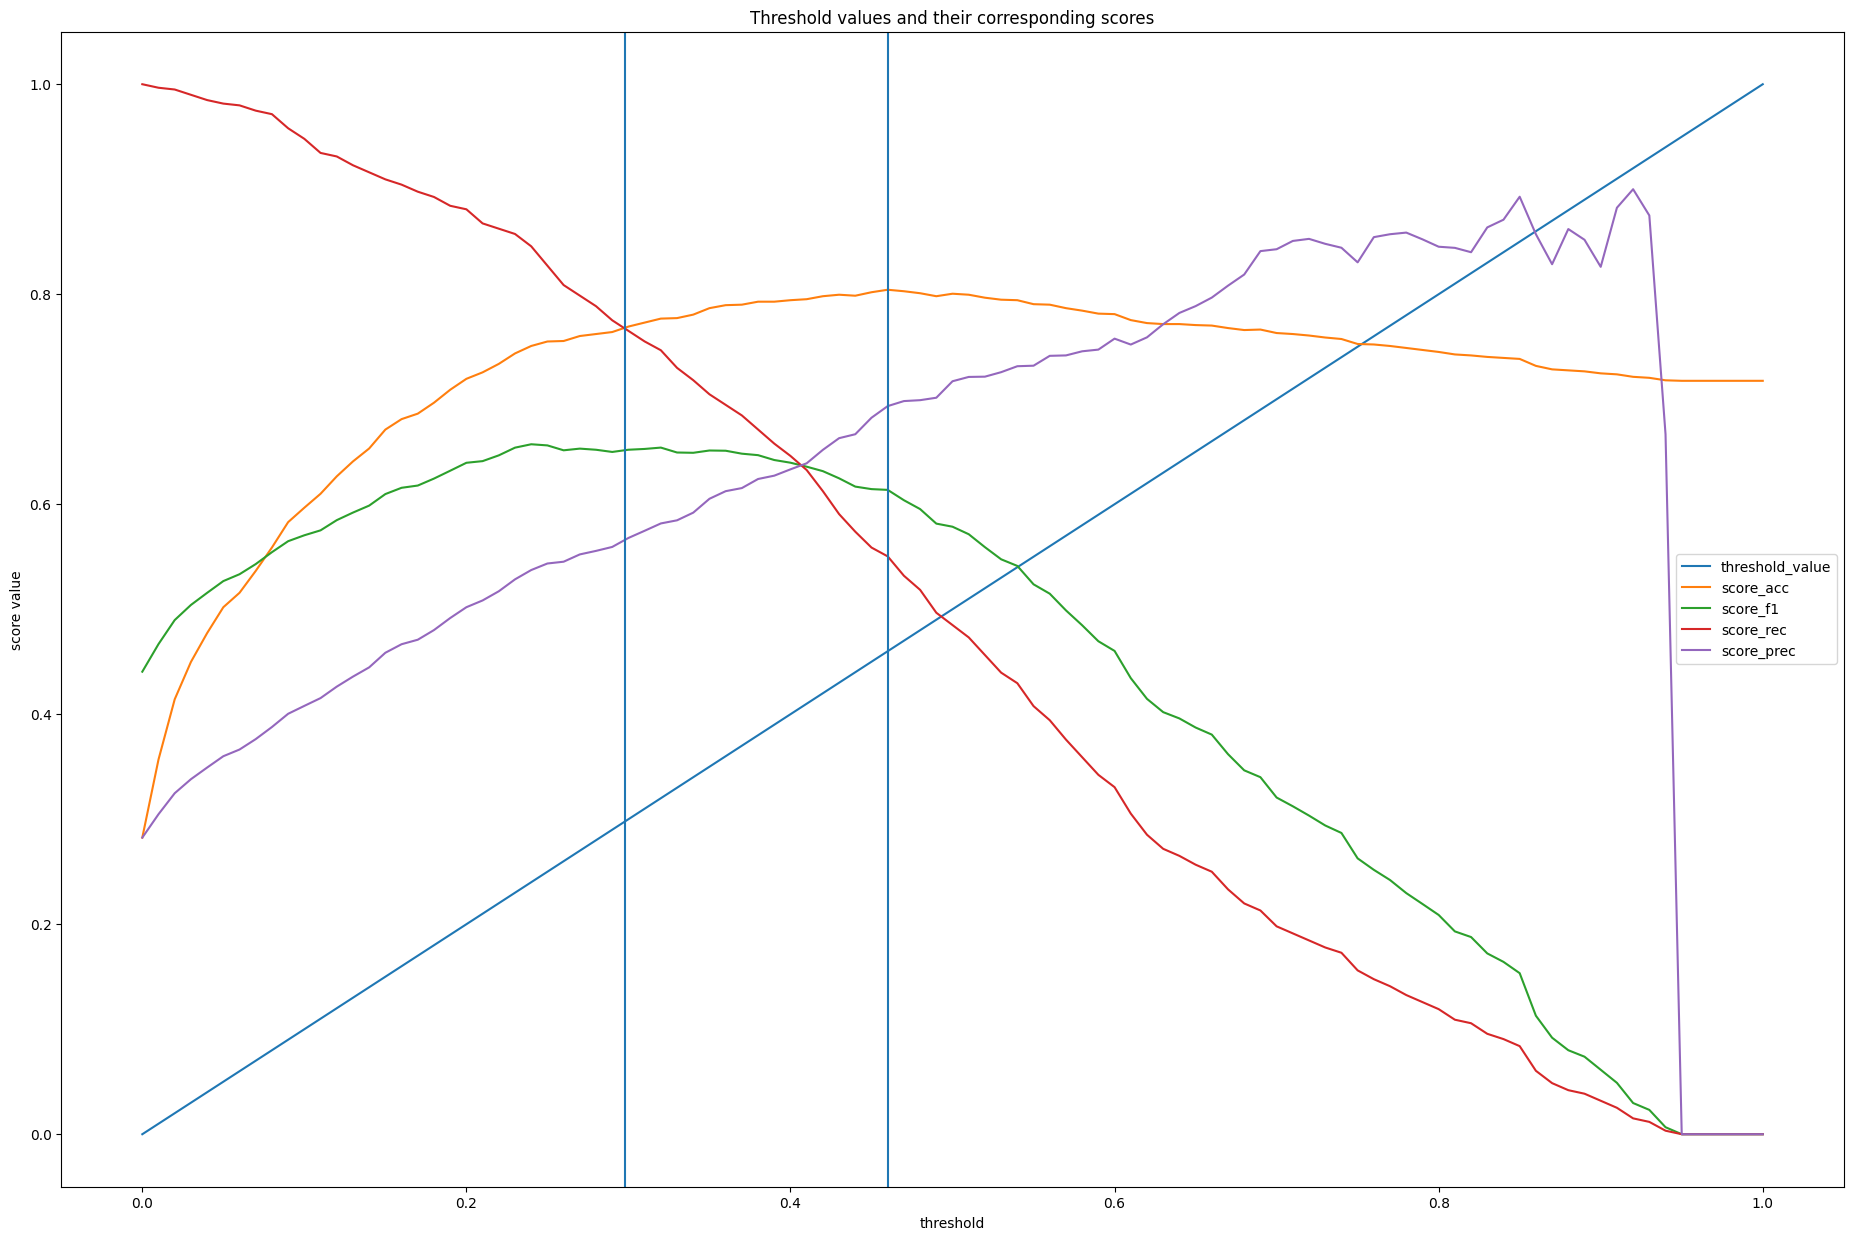

In [173]:
test_forest=test_thresh(x=y_prob_forest_grid)
test_forest.plot(title='Threshold values and their corresponding scores',xlabel='threshold',ylabel='score value')
plt.axvline(float(test_forest.loc[test_forest['score_acc']==test_forest['score_acc'].max(),'threshold_value']))
plt.axvline(0.298)

In [162]:
acc_rec_prec(y_prob_forest_grid,thresh=0.298)

Accuracy is 77.01% 
 
    Recall is 76.85% 

    Precision is 56.89%
